[Documentation exhaustive](https://readthedocs.org/projects/jupyter-notebook/downloads/pdf/latest/)

In [33]:
from IPython.display import IFrame
IFrame(src="https://readthedocs.org/projects/jupyter-notebook/downloads/pdf/latest/", width=800, height=400)

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo("uHGlCi9jOWY")

# Installation

On utilisera [Anaconda](https://www.anaconda.com/distribution/) qui distribue non seulement Jupyter mais aussi toutes sortes d'extensions et de bibliothèques python.

# Démarrage

On peut utiliser jupyter pour lancer un serveur qui permettra d'éditer et exécuter les Notebooks :

`jupyter notebook`

Les Notebooks sont alors accessibles à partir de [http://localhost:8888/](http://localhost:8888/).

# Utilisation

Le Notebook est composé d'une suite de *cellules* qui pourront être exécutées et provoquer des affichages. Les principaux types de cules sont :

 * Texte [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
 * code
 
Les autres types de cellules sont :
 * [Raw NBconvert](https://nbsphinx.readthedocs.io/en/0.3.1/raw-cells.html) utilisé pour la création de documents dans d'autres formats
 * ~~Heading~~ est obsolète
 
 Il est important de comprendre que le Notebook est exécuté sur un **serveur** qui peut être distant, le moteur d'exécution du code étant appelé /kernel/.

# Menus

## File 

En plus de permettre de créer de nouveaux Notebook (en choisissant le *kernel* qui déterminera le langage de programmation utilisé par les cellules de code), ce menu permet principalement de sauvegarder mais aussi de télécharger le Notebook (utile lors que celui-ci est exécuté sur un serveur distant).

## Edit
Outre les fonctions classiques d'édition (couper/copier/coller) appliquées aux cellules (disponibles aussi sous forme d'icônes), on a un raccourci pour insérer une image l'intégrant au Notebook et générer le Markdown qui permet d'afficher celle-ci, par exemple 

`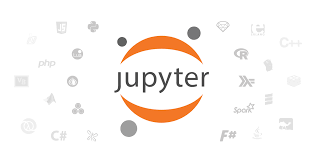` :
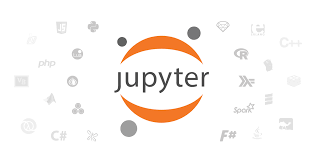

Si l'option d'intéger des images comme attachements dans le fichier Notebook est a priori séduisante, elle n'est malheureusement pas gérée par de nombreuses fonctionnalités. Par exemple pour pouvoir exporter un PDF à partir de ce Notebook, il faur remplacer le code markdown ci-dessus par celui qui référence un fichier séparé :
`![index.png](img/index.png)`

## View

En plus de l'affichage ou non d'éléments d'interface graphique concernant le Notebook, on peut afficher ou non des éléments d'interface graphique permettant de gérer des méta-données pour chaque cellule. Ceci est principalement utile pour les extensions (par exemple définir les slides d'une présentation).

## Cell

Ce menu permet de faire des actions concernant les cellules : les exécuter, changer leur type et contrôler ce qu'elles affichent.

## Kernel

Le mernu *Kernel* permet de contrôle le moteur d'exécution qui tourne sur le serveur.

## Navigate

Le menu *Navigate* permet de se déplacer rapidement dans un Notebook à partir des titres présents dans les cellules de text (Markdown).

## Widget

Le menu *Widget* concerne les éventuels éléments interactif du Notebook que l'on édite. Dans un premier temps, il ne nous concernera pas. On peut cependant observer ce qu'il fait en sélectionnant
~Widget~ → ~Embed Widgets~ et en constant qu'il y a bien des informations relatifs au *Widget* ci-dessous.


In [35]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)

## Help

Le menu ~Help~ contient des liens vers différents sites de documentation, mais aussi une 'visite guidée' que nous allon suivre immédiatement.

## …

D'autres menus peuvent être ajoutés par des extensions

# Icônes

La barre d'icônes proposent des raccourcis pour les opérations les plus fréquentes :
* Sauvegarder
* Insérer une cellule après la cellule en cours d'utilisation
* Couper
* Copier
* Coller
* Déplacer vers le haut
* Déplacer vers le bas
* Exécuter
* Interrompre l'éxcution
* Relancer le kernel
* Relancer le kernel et déclencher l'exécution de toutes les cellules
* Changer le type de la cellule (Code ou Markdown)
* … (autres icônes spécifiques aux extensions)



# Exemples de cellules de code :

Les cellules de code peuvent être exécutées individuellement ou en lançant l'exécution de toutes les cellules (ou toutes celles situées avant ou après la cellule en cours d'utilisation). L'ordre d'exécution des cellules est indiqué en marge à gauche au niveau de la cellule du code après `In` et au niveau de l'éventuel affichage après `Out` (par exemple `In [36]:` et `Out [36]:` pour la cellule qui aura été la 36ième exécutée par le kernel).


## Cellule de code élémentaire produisant un affichage

In [36]:
print("Hello !")

Hello !


## Cellule affectant une variable

In [37]:
a=1

## Cellule dont la dernière valeur est affichée

In [38]:
a

1

## Cellule qu'il va falloir interrompre !

In [39]:
while True:
    pass

KeyboardInterrupt: 

In [40]:
print("Done")

Done


# Exécutions partielles / désordonnées

On peut exécuter (ou non!) chaque cellule de code. Le fragment de code contenu dans une cellulle peut donc être exécuté :
 * 0 fois (il n'est pas exécuté)
 * 1 fois
 * plusieurs fois
 
C'est à la fois *pratique* et *dangeureux*. Pour en comprendre et anticiper les conséquences, il est intéressant de savoir si un fragment de code donnés est :
 1. pur : il ne dépend pas de l'état du *kernel* en cours d'exécution et ne modifie pas ce dernier
 2. sans effets de bord : il ne modifie pas l'état du *kernel* en cours d'exécution :le seul résultat est l'affichage
 3. idempotent : ses effets sont les mêmes, qu'il soit exécuté une ou plusieurs fois
 4. non-idempotent : ses effets dépendent du nomdre d'exécutions

## cellule de code pur

In [1]:
2**10

1024

## Cellule de code sans effets de bord

Soit une cellule ayant préalablement modifié l'état du *kernel*, par exemple pour déclarer une variable:

In [2]:
a= 10

La cellule suivante dépend de l'état du noyau puisqu'elle utilise cette variable, mais elle n'a pas d'effet de bord puisque l'état du *kernel* n'est pas modifié :

In [3]:
2**a

1024

## Cellule de code idempotente
On peut exécuter la cellule suivante autant de fois que l'on veut sans que cela change l'état du *kernel* :

In [4]:
b=2
b**a

1024

## Cellule de code non idempotente

Chaque exécution de la cellule suivante entraîne une nouvelle modification de l'état du *kernel* :

In [6]:
a= a+1
b**a

4096

# Cellules de texte en Markdown

Exemples :

    # Titre
# Titre

    ## Sous-titre
## Sous-titre

    ##### Etc…
##### Etc…

## Listes
### Non numérotées
    * One
        - Sublist
            - This
      - Sublist
            - That
            - The other thing
    * Two
      - Sublist
    * Three
      - Sublist
* One
    - Sublist
        - This
  - Sublist
        - That
        - The other thing
* Two
  - Sublist
* Three
  - Sublist
  
### Numérotées

    1. Here we go
        1. Sublist
        2. Sublist
    2. There we go
    3. Now this
  
1. Here we go
    1. Sublist
    2. Sublist
2. There we go
3. Now this

# Tableau
  
    <table>
      <tr>
        <th>Colonne 1</th>
        <th>Colonne 2</th>
      </tr>
      <tr>
        <td> ligne 1, colonne 1</td>
        <td> ligne 1, colonne 2</td>
      </tr>
      <tr>
        <td>ligne 2, colonne 1</td>
        <td>ligne 2, colonne 2</td>
      </tr>
    </table>

<table>
  <tr>
    <th>Colonne 1</th>
    <th>Colonne 2</th>
  </tr>
  <tr>
    <td> ligne 1, colonne 1</td>
    <td> ligne 1, colonne 2</td>
  </tr>
  <tr>
    <td>ligne 2, colonne 1</td>
    <td>ligne 2, colonne 2</td>
  </tr>
</table>

## Images
### Image locale (sur le serveur Notebook !)
    ![index.png](img/index.png)

![index.png](img/index.png)

### Image sur internet

    <img src="https://www.fr.total.com/sites/all/themes/custom/business_theme/logo.png" />


<img src="https://www.fr.total.com/sites/all/themes/custom/business_theme/logo.png" />


## Écriture de symboles mathématiques et d'équations

Le langage utilisé est [LaTeX](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols), plus exactement [le sous-ensemble implémenté par MathJax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html). La [liste de symboles](http://mirrors.standaloneinstaller.com/ctan/info/symbols/comprehensive/symbols-a4.pdf) est longue ! On peut aussi [rechercher en dessinant un symbole](http://detexify.kirelabs.org/classify.html).


### Au fil du texte

    Au milieu de texte: $e^{i\pi} + 1 = 0$
    
Au milieu de texte: $e^{i\pi} + 1 = 0$

### Une équation

    \begin{equation}
      e^x = \sum_{j=0}^{\infty} \frac{1}{j!} x^j
    \end{equation}


\begin{equation}
  e^x = \sum_{j=0}^{\infty} \frac{1}{j!} x^j
\end{equation}

### Un bloc d'équations (alignées)

    \begin{align}
    \dot{x} & = \sigma(y-x) \\
    \rho x - y - xz & = \dot{y} \\
    \dot{z} & = -\beta z + xy
    \end{align}`

\begin{align}
\dot{x} & = \sigma(y-x) \\
\rho x - y - xz & = \dot{y} \\
\dot{z} & = -\beta z + xy
\end{align}`


# Fragments de 'code'

Si le code destiné à être exécuté doit être mis dans les cellules de type *code*, on peut vouloir mettre du 'code' qui devra être représenté tel quel et non interprété comme du Markdown ou tu LaTeX.
C'est ce qui a été fait ci-dessus pour montrer le code Markdown avant chacun des exemples. On définit un tel bloc de code en commençant la ligne par 4 espaces (ou une tabulation).

On peut aussi mettre un fragment a cours du texte en l'entourant de *backquotes* par exemple `…en l'entourant de *backquotes*`.

# 'Magic'
Dans les cellules de code, on peut utiliser des commandes spéciales, appelées 'magics', qui commencent par `%` ou `%%` selon qu'elles s'appliquent à une seule ligne ou à la cellule tout entière. On peut en avoir la liste avec la 'magic' `%lsmagic%` (certaines sont ajoutées par des extensions, cf infra.):

In [41]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%clojure  %%debug  %%file  %%groovy  %%html  %%java  %%javascript  %%js  %%kotlin  %%latex 

## %pdoc

`%pdoc` permet d'ouvir la documentation d'une fonction :

In [42]:
%pdoc int

# %%time

Ne pas oublier de mettre **2** `%` si l'on veut chronométrer le temps d'exécution de /la cellule/ !

In [43]:
%%time
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 324 ms, sys: 0 ns, total: 324 ms
Wall time: 323 ms


In [44]:
%%time
total = 0
for i in range(10000):
    for j in range(1000):
        total += i * (-1) ** j

CPU times: user 2.79 s, sys: 0 ns, total: 2.79 s
Wall time: 2.78 s


# Extensions

Beaucoup d'extensions sont disponibles pour les Notebook, mais elles sont de qualité variable. J'utilise :

 * [RISE](https://github.com/damianavila/RISE) pour faire des présentations
 * Snippets de [contrib-nbextensions](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/snippets_menu/readme.html) et [boilerplate](https://github.com/moble/jupyter_boilerplate) pour avoir à disposition des fragments de code d'exemples.
 * et toutes celles qui font partie de [BeakerX](http://beakerx.com/) que j'utilise pour mes Notebooks dans d'autres langages que Python.




# Exercices

## Créer un nouveau Notebook

## Changer son nom en 'J1-N01-Découverte'

L'extension `.ipynb` est ajoutée au nom de fichier.

## Créer une cellule de texte avec en titre "Premier Notebook"


Mettre dans cette cellule :
 * Du texte avec des passages en italique, des passages en caractères gras et des passages soulignés 
 * Une liste non numérotée
 * Une liste numérotée
 * Des sous-listes
 * Un lien vers un une page web
 * une image sur le web
 * une image locale
 * Du texte avec une formule mathématique dedans (par exemple que la racine carrée de i est égale à -1)
 

## Créer une cellule de code

Faire en sorte qu'elle affiche une [vidéo du site Vimeo](https://vimeo.com/351762550).

## Exécution de code

Créer les cellules de code suivantes :

 1.
```py
a = 1
print(a)```
 2.
```py
 print(a)```
 3.
```py
 a = a + 1
 print(a)```
 
 
 Exécuter ces cellules dans l'ordre et constater les affichages de chaque cellule. Réexécuter la cellule `3.` puis la cellule `2.`. Constater que :

 * Une cellule exécutée plusieurs fois ne donne pas forcément le même résultat
 * L'ordre d'exécution des cellules est important !
 
 Le kernel maintient un état qui est partagé par toutes les cellules. 

In [7]:
%ldir
print("hello")

drwxr-xr-x  2 bernard      4096 Jan  9 08:49 config/
drwxr-xr-x 19 bernard      4096 Jan 17 00:23 Data/
drwxr-xr-x  2 bernard      4096 Jan 13 10:50 img/
drwxr-xr-x  3 bernard      4096 Jan 16 20:14 misc/
hello


# Débuggeur

On peut utiliser [pdb](https://docs.python.org/fr/3/library/pdb.html), le débuggeur python, qui met à disposition [une liste de commades](https://docs.python.org/fr/3/library/pdb.html#debugger-commands) (notamment `c` pour continuer) et permet d'afficher la valeur d'expression et de variables, y compris locales):

## Magic
On peut utiliser une 'magic' pour activer le débugger :

In [8]:
%pdb on
for i in range(10):
    print(10/i-2)

Automatic pdb calling has been turned ON


ZeroDivisionError: division by zero

> <ipython-input-8-e36d8ce72918>(3)<module>()
      1 get_ipython().run_line_magic('pdb', 'on')
      2 for i in range(10):
----> 3     print(10/i-2)

ipdb> i
0
ipdb> i-2
-2
ipdb> q


## Appel explicite

On peut aussi appeler directement le débugger n'importe oùdans le code ane appelant la méthode `set_trace` du module `:

In [9]:
from IPython.core.debugger import set_trace

In [12]:
def my_div(x,y):
    res = 0
    set_trace()
    res = x/y    
    return res

my_div(12,4)

> <ipython-input-12-809cc959734a>(4)my_div()
      2     res = 0
      3     set_trace()
----> 4     res = x/y
      5     return res
      6 

ipdb> c


3.0